# 1. Bussiness Understanding 

# 2. Data Understanding 

## 2.1 Import Libraries 

In [2]:
# ====== Data Handling ======
import pandas as pd
import numpy as np
import ast
from collections import Counter

# ====== Visualization ======
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ====== Preprocessing ======
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, QuantileTransformer

# ====== Regression & Tree Models ======
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import randint, uniform

# ====== Clustering ======
from sklearn.cluster import KMeans

# ====== Correlation & Statistics ======
from scipy.stats import pearsonr, spearmanr

# ====== NLP ======
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic

# ====== Geospatial ======
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from shapely.geometry import Point
from branca.element import Template, MacroElement, Element


# ====== Utilities ======
import warnings
warnings.filterwarnings("ignore")
import joblib
from joblib import dump
import pickle


from scipy.stats import randint, uniform

## 2.2 Loading the Data 

In [3]:
# Load the new datasets
future_calendar = pd.read_csv("Data/Future Calendar Rates.csv")
listings_v2 = pd.read_csv("Data/Listings (2).csv")
past_calendar = pd.read_csv("Data/Past Calendar Rates.csv")
reviews_v2 = pd.read_csv("Data/Reviews (2).csv")

# 3. Data Understanding 

### 3.1 check the first 5 rows of each data

In [4]:
# Display the first 5 rows of the future_calendar dataset
future_calendar.head()

,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,41759384,2025-11-01,30,0,0.0,0.0,54.0,NaN,NaN,NaN,2.0,NaN,6977.0,0.0
1,14535080,2026-01-01,31,0,0.0,0.0,9.7,NaN,NaN,NaN,28.0,NaN,1253.0,0.0
2,41759384,2026-07-01,31,0,0.0,0.0,53.5,NaN,NaN,NaN,NaN,NaN,6912.0,0.0
3,14535080,2025-12-01,31,0,0.0,0.0,9.7,NaN,NaN,NaN,28.0,NaN,1253.0,0.0
4,14535080,2026-08-01,31,0,0.0,0.0,10.3,NaN,NaN,NaN,28.0,NaN,1331.0,0.0


In [5]:
# Display the first 5 rows of the listings_v2 dataset
listings_v2.head()

,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,https://a0.muscache.com/im/pictures/6434524/bc...,37,2280941,Bella,NaN,NaN,...,0.500,0.726,20.1,2594.2,29.1,3765.7,45,28,45,90
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/68ecc57f-d...,29,4856316,Chichi,NaN,NaN,...,0.111,0.147,5.8,753.7,7.7,997.5,10,22,80,90
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,https://a0.muscache.com/im/pictures/01cc7287-2...,20,5634522,Janet,NaN,NaN,...,0.044,0.000,0.9,112.0,0.0,0.0,4,0,86,90
3,1237886,Hob House,Room in bed and breakfast,hotel_room,https://a0.muscache.com/im/pictures/cbdab7e1-f...,8,6748840,NaN,NaN,NaN,...,0.056,0.000,6.9,890.1,0.0,0.0,5,0,85,90
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/786899c5-b...,58,4856316,Chichi,NaN,NaN,...,0.044,0.055,5.6,727.9,6.9,897.4,4,17,86,90


In [6]:
# Display the first 5 rows of the past_calendar dataset
past_calendar.head()

,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,21520917,2024-12-01,22,9,0.29,345.0,37.6,38.3,5.0,9.0,NaN,4960.0,4869.0,44680.0
1,39875956,2025-08-01,31,0,0.00,0.0,69.1,NaN,NaN,NaN,1.0,NaN,8928.0,0.0
2,36253079,2025-04-01,30,0,0.00,0.0,33.7,NaN,NaN,NaN,1.0,NaN,4364.0,0.0
3,40675899,2024-09-01,24,6,0.20,243.0,40.2,40.5,1.0,9.0,NaN,5232.0,5193.0,31391.0
4,21520917,2025-01-01,31,0,0.00,0.0,37.2,NaN,NaN,NaN,1.0,NaN,4805.0,0.0


In [7]:
# Display the first 5 rows of the past_calendar dataset
reviews_v2.head()

,listing_id,date,num_reviews,reviewers
0,16701882,2025-04-01,1,341960500
1,37808882,2025-05-01,1,424270789
2,13381106,2024-10-01,3,"5995258,172444062,74140354"
3,37808882,2025-07-01,1,381061119
4,471581,2025-06-01,1,138579311


### 3.2 check the columns and the shape of the data 

In [8]:
# Check shape and columns for each dataset
datasets = {
    "future_calendar": future_calendar,
    "listings_v2": listings_v2,
    "past_calendar": past_calendar,
    "reviews_v2": reviews_v2
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())



future_calendar:
Shape: (3480, 14)
Columns: ['listing_id', 'date', 'vacant_days', 'reserved_days', 'occupancy', 'revenue', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'native_booked_rate_avg', 'native_rate_avg', 'native_revenue']

listings_v2:
Shape: (300, 61)
Columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_rev

### 3.3 Summary Statistics 

In [9]:
# Summary statistics for each dataset
print("📊 Future Calendar Summary\n", future_calendar.describe(include='all').T)
print("\n📊 Listings Summary\n", listings_v2.describe(include='all').T)
print("\n📊 Past Calendar Summary\n", past_calendar.describe(include='all').T)
print("\n📊 Reviews Summary\n", reviews_v2.describe(include='all').T)

📊 Future Calendar Summary
                          count unique         top freq             mean  \
listing_id              3480.0    NaN         NaN  NaN  27742328.955172   
date                      3480     12  2025-11-01  290              NaN   
vacant_days             3480.0    NaN         NaN  NaN        28.672414   
reserved_days           3480.0    NaN         NaN  NaN         1.744253   
occupancy               3480.0    NaN         NaN  NaN         0.057449   
revenue                 3480.0    NaN         NaN  NaN       100.619828   
rate_avg                3480.0    NaN         NaN  NaN        57.618218   
booked_rate_avg          389.0    NaN         NaN  NaN        73.882005   
booking_lead_time_avg    243.0    NaN         NaN  NaN       124.893004   
length_of_stay_avg       243.0    NaN         NaN  NaN        18.255144   
min_nights_avg          3283.0    NaN         NaN  NaN         2.353945   
native_booked_rate_avg   389.0    NaN         NaN  NaN       9545.81491  

### 3.4 Check for Missing Values in both Counts and Percentage 

In [10]:
# Function to check missing values in count and percentage
def missing_values_summary(df):
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)
    })
    return missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

# Check missing values for each dataset
print("Future Calendar Missing Values:")
display(missing_values_summary(future_calendar))

print("\nListings_v2 Missing Values:")
display(missing_values_summary(listings_v2))

print("\nPast Calendar Missing Values:")
display(missing_values_summary(past_calendar))

print("\nReviews_v2 Missing Values:")
display(missing_values_summary(reviews_v2))


Future Calendar Missing Values:


,Missing Count,Missing Percentage
booking_lead_time_avg,3237,93.02
length_of_stay_avg,3237,93.02
booked_rate_avg,3091,88.82
native_booked_rate_avg,3091,88.82
min_nights_avg,197,5.66



Listings_v2 Missing Values:


,Missing Count,Missing Percentage
cohost_names,225,75.00
cohost_ids,225,75.00
bedrooms,51,17.00
guests,42,14.00
instant_book,23,7.67
extra_guest_fee,21,7.00
rating_value,10,3.33
rating_accuracy,10,3.33
rating_location,10,3.33
rating_communication,10,3.33



Past Calendar Missing Values:


,Missing Count,Missing Percentage
booking_lead_time_avg,1874,52.91
length_of_stay_avg,1874,52.91
booked_rate_avg,1667,47.06
native_booked_rate_avg,1667,47.06
min_nights_avg,1162,32.81



Reviews_v2 Missing Values:


,Missing Count,Missing Percentage


### 3.5 Check for unique values 

In [11]:
# Function to check unique values per column
def unique_values_summary(df):
    unique_counts = df.nunique()
    unique_summary = pd.DataFrame({
        'Unique Values Count': unique_counts
    })
    return unique_summary.sort_values(by='Unique Values Count', ascending=False)

# ================================
# Check unique values per dataset
# ================================

print("🔹 Future Calendar Unique Values:")
display(unique_values_summary(future_calendar))

print("\n🔹 Listings_v2 Unique Values:")
display(unique_values_summary(listings_v2))

print("\n🔹 Past Calendar Unique Values:")
display(unique_values_summary(past_calendar))

print("\n🔹 Reviews_v2 Unique Values:")
display(unique_values_summary(reviews_v2))


🔹 Future Calendar Unique Values:


,Unique Values Count
rate_avg,1033
native_rate_avg,1033
revenue,352
native_revenue,352
booked_rate_avg,302
native_booked_rate_avg,302
listing_id,290
booking_lead_time_avg,159
occupancy,59
length_of_stay_avg,49



🔹 Listings_v2 Unique Values:


,Unique Values Count
listing_id,300
ttm_revpar_native,300
ttm_avg_rate_native,300
ttm_revenue_native,300
listing_name,299
...,...
registration,2
superhost,2
ttm_total_days,1
currency,1



🔹 Past Calendar Unique Values:


,Unique Values Count
native_rate_avg,2368
native_revenue,1681
native_booked_rate_avg,1468
rate_avg,1061
revenue,1043
booked_rate_avg,822
listing_id,300
booking_lead_time_avg,169
occupancy,87
length_of_stay_avg,58



🔹 Reviews_v2 Unique Values:


,Unique Values Count
reviewers,975
listing_id,242
date,12
num_reviews,10


### 3.6 Check data types 

In [12]:
# Function to check data types
def datatypes_summary(df):
    dtypes_summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum()
    })
    return dtypes_summary

# ================================
# Check data types per dataset
# ================================

print("🔹 Future Calendar Data Types:")
display(datatypes_summary(future_calendar))

print("\n🔹 Listings_v2 Data Types:")
display(datatypes_summary(listings_v2))

print("\n🔹 Past Calendar Data Types:")
display(datatypes_summary(past_calendar))

print("\n🔹 Reviews_v2 Data Types:")
display(datatypes_summary(reviews_v2))



🔹 Future Calendar Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,3480,0
date,object,3480,0
vacant_days,int64,3480,0
reserved_days,int64,3480,0
occupancy,float64,3480,0
revenue,float64,3480,0
rate_avg,float64,3480,0
booked_rate_avg,float64,389,3091
booking_lead_time_avg,float64,243,3237
length_of_stay_avg,float64,243,3237



🔹 Listings_v2 Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,300,0
listing_name,object,300,0
listing_type,object,300,0
room_type,object,300,0
cover_photo_url,object,300,0
...,...,...,...
l90d_adjusted_revpar_native,float64,300,0
l90d_reserved_days,int64,300,0
l90d_blocked_days,int64,300,0
l90d_available_days,int64,300,0



🔹 Past Calendar Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,3542,0
date,object,3542,0
vacant_days,int64,3542,0
reserved_days,int64,3542,0
occupancy,float64,3542,0
revenue,float64,3542,0
rate_avg,float64,3542,0
booked_rate_avg,float64,1875,1667
booking_lead_time_avg,float64,1668,1874
length_of_stay_avg,float64,1668,1874



🔹 Reviews_v2 Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,997,0
date,object,997,0
num_reviews,int64,997,0
reviewers,object,997,0


# 4. Data Cleaning 

1. **Remove duplicates:** Ensures each row is unique.  
2. **Handle missing values:**  
   - Categorical/text columns → fill with `"Unknown"` and standardize text.  
   - Numeric columns → fill with the median value.  
   - Date columns → fill with the earliest date.  
3. **Convert data types:**  
   - Columns containing "date" → converted to datetime format.  
   - Numeric-looking strings → converted to numeric types where possible.  

The function is applied to all datasets (`future_calendar`, `listings_v2`, `past_calendar`, `reviews_v2`) to standardize and prepare them for analysis.

In [13]:
import pandas as pd

# ==============
# Data Cleaning
# ==============

def clean_dataframe(df, dataset_name):
    print(f"\n🔹 Cleaning {dataset_name}...")

    # 1. Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed duplicates → New shape: {df.shape}")

    # 2. Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':  
            # Fill categorical/text missing values with "Unknown"
            df[col] = df[col].fillna("Unknown").str.strip().str.lower()
        elif pd.api.types.is_numeric_dtype(df[col]):
            # Fill numeric missing values with median
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Fill missing dates with earliest date
            df[col] = df[col].fillna(df[col].min())

    # 3. Convert data types
    for col in df.columns:
        # Convert dates
        if "date" in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

        # Convert numeric-looking strings
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='ignore')

    print(f"Finished cleaning {dataset_name}.")
    return df


# Apply cleaning function to each dataset
future_calendar = clean_dataframe(future_calendar, "Future Calendar")
listings_v2 = clean_dataframe(listings_v2, "Listings V2")
past_calendar = clean_dataframe(past_calendar, "Past Calendar")
reviews_v2 = clean_dataframe(reviews_v2, "Reviews V2")



🔹 Cleaning Future Calendar...
Removed duplicates → New shape: (3480, 14)
Finished cleaning Future Calendar.

🔹 Cleaning Listings V2...
Removed duplicates → New shape: (300, 61)
Finished cleaning Listings V2.

🔹 Cleaning Past Calendar...
Removed duplicates → New shape: (3542, 14)
Finished cleaning Past Calendar.

🔹 Cleaning Reviews V2...
Removed duplicates → New shape: (997, 4)
Finished cleaning Reviews V2.


### 4.1 Merge the Data 

1. **Merge reviews into listings:**  
   - `listings_v2` is joined with `reviews_v2` on `listing_id` using a left join to keep all listings.  

2. **Combine past and future calendars:**  
   - `past_calendar` and `future_calendar` are concatenated vertically to form a complete calendar dataset.  

3. **Merge calendar with listings + reviews:**  
   - The combined calendar is merged with `listings_reviews` on `listing_id` using a left join to create `master_df`. 

In [14]:
# 1. Merge reviews into listings
listings_reviews = listings_v2.merge(reviews_v2, on="listing_id", how="left")

# 2. Combine past and future calendar
calendar_all = pd.concat([past_calendar, future_calendar], axis=0)

# 3. Merge calendar with listings + reviews
master_df = listings_reviews.merge(calendar_all, on="listing_id", how="left")

# 4. Check result
print("Master dataset shape:", master_df.shape)
print("Master dataset columns:", master_df.columns.tolist())


Master dataset shape: (25117, 77)
Master dataset columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native', 'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days', 'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native', 'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy', 'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_

# 5. Exploratory Data Analysis

### 5.1 Univariate Analysis

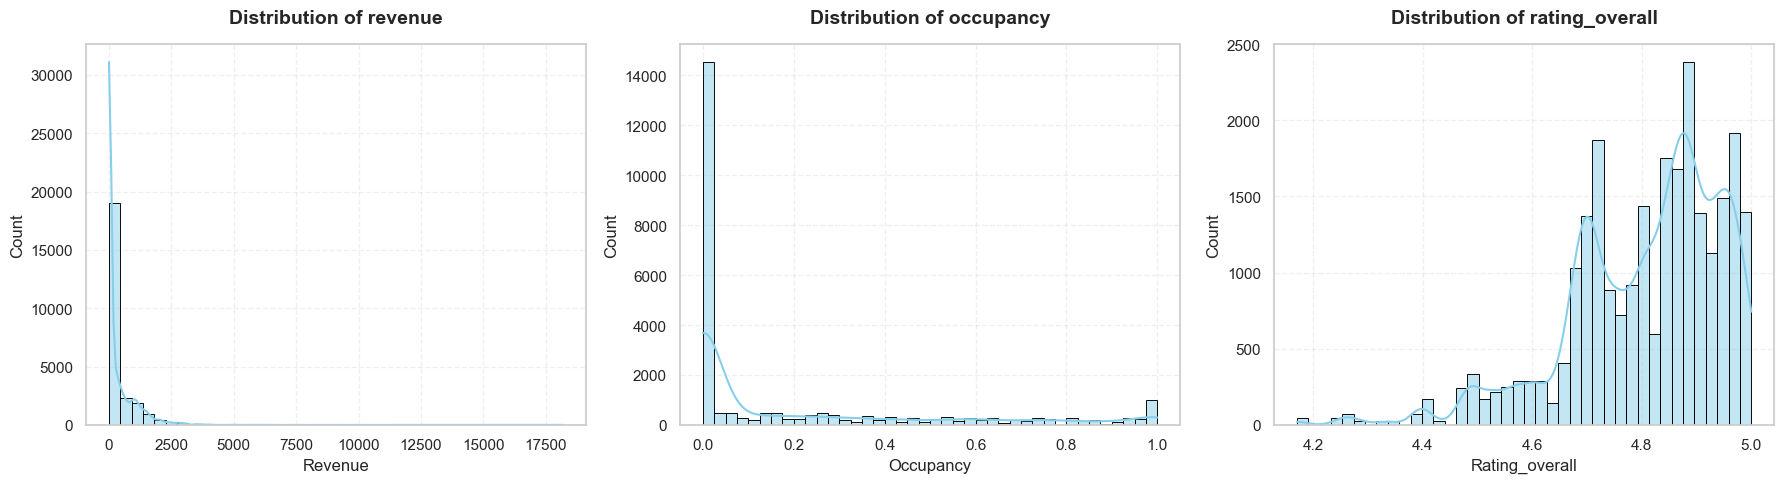

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
num_cols = ["revenue", "occupancy", "rating_overall"]

# Plot in groups of three
for i in range(0, len(num_cols), 3):
    cols_subset = num_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]  # ensure axes is iterable
    
    for ax, col in zip(axes, cols_subset):
        sns.histplot(master_df[col], kde=True, bins=40, color="skyblue", edgecolor="black", ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.grid(alpha=0.3, linestyle="--")
    
    plt.tight_layout()
    plt.show()


- **Revenue:** Most properties generate very low revenue, with a few high-revenue outliers. The distribution is **right-skewed** with a long tail.  

- **Occupancy:** Many properties have low or zero occupancy, while a smaller number have high occupancy. The distribution is **left-skewed**, with most values near zero.  

- **Overall Rating:** Most properties are rated very highly (4.5–5.0), with peaks at 5.0 and other high scores. The distribution is **right-skewed** and **multimodal**, with very few low ratings.


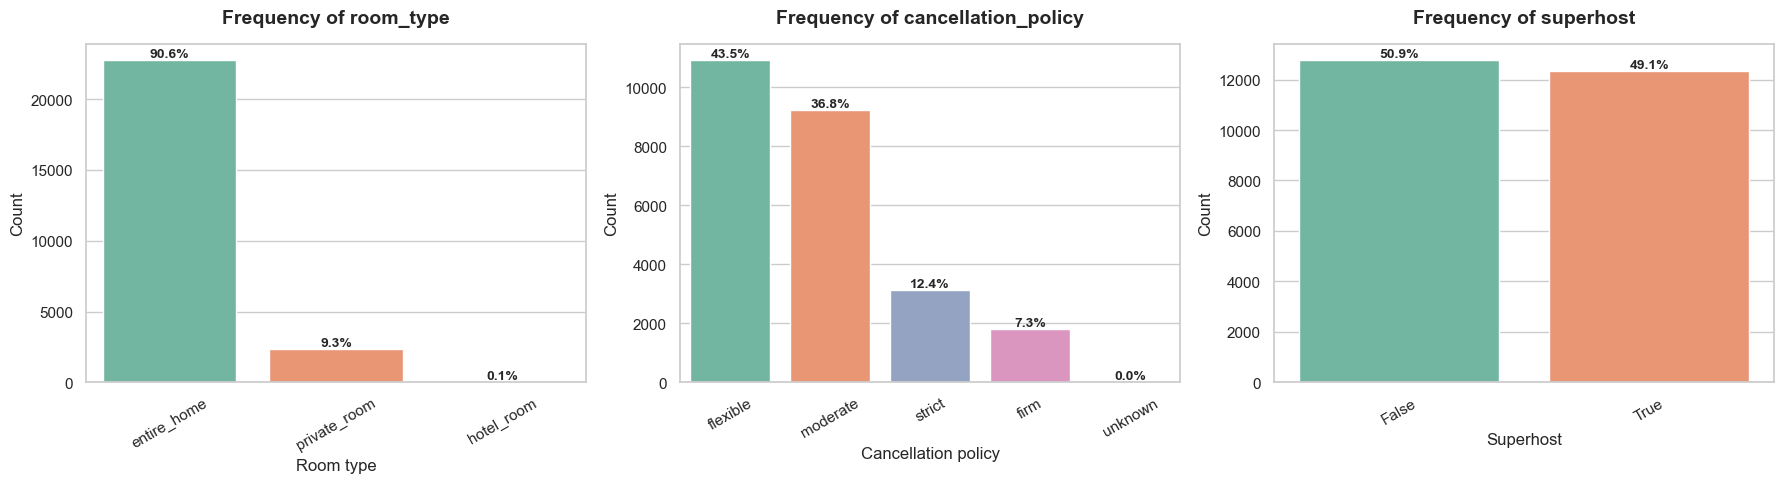

In [16]:
cat_cols = ["room_type", "cancellation_policy", "superhost"]

for i in range(0, len(cat_cols), 3):
    cols_subset = cat_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_subset):
        sns.countplot(
            data=master_df,
            x=col,
            order=master_df[col].value_counts().index,
            palette="Set2",
            ax=ax
        )

        total = len(master_df[col])
        for p in ax.patches:
            percentage = f"{100 * p.get_height() / total:.1f}%"
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, fontweight="bold")

        ax.set_title(f"Frequency of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()


- **Room Type:** Most listings are **entire homes/apartments (90.6%)**, followed by **private rooms (9.3%)**, with **hotel rooms** being rare (0.1%).  

- **Cancellation Policy:** **Flexible (43.5%)** and **moderate (36.8%)** policies dominate, while stricter policies (**strict 12.4%, firm 7.3%**) are less common.  

- **Superhost Status:** Listings are nearly evenly split between **superhosts (49.1%)** and **non-superhosts (50.9%)**.


### 5.2 Bivariate Analysis

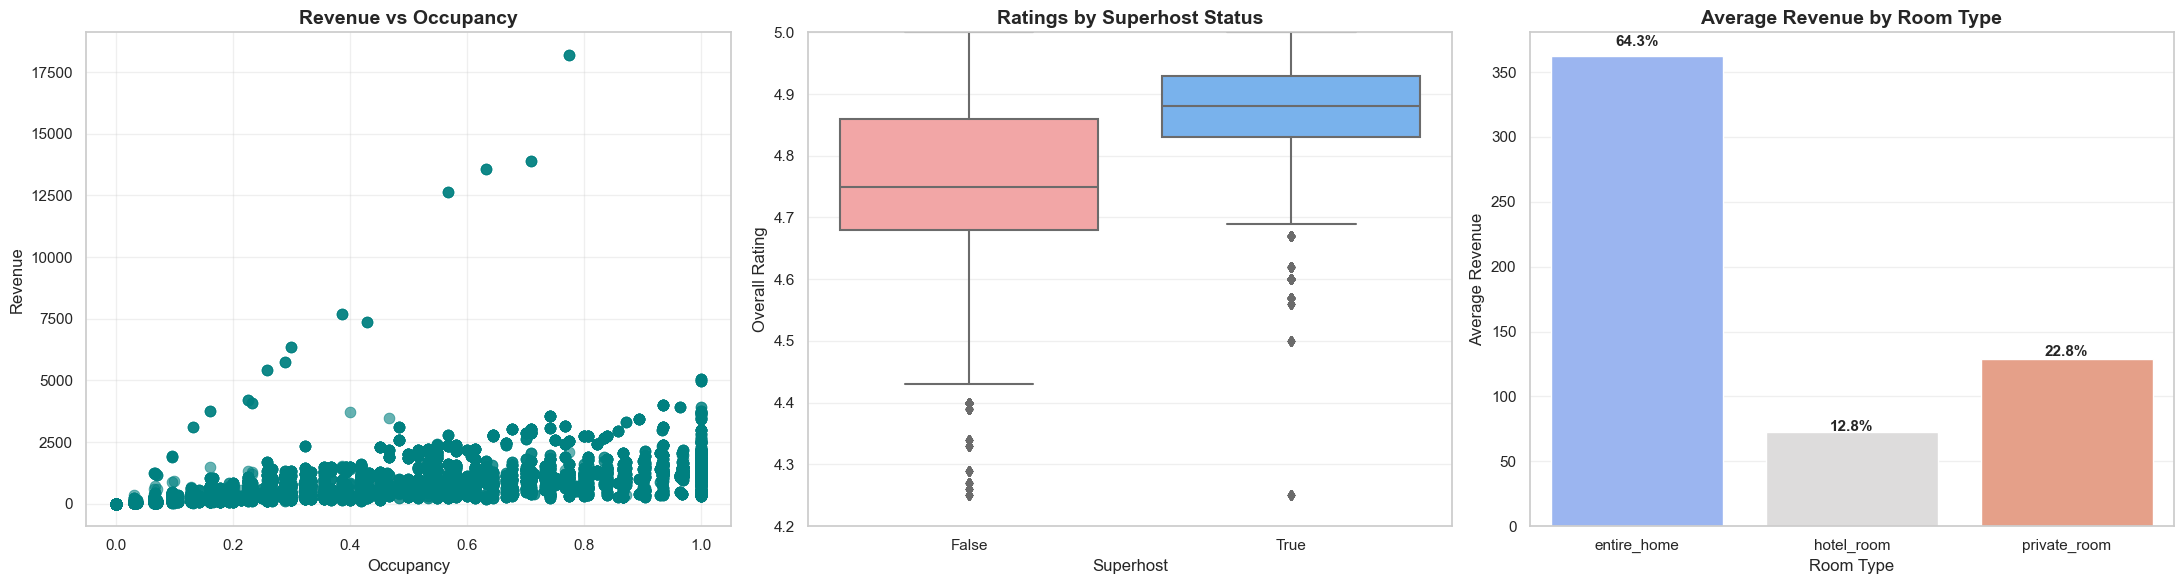

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
palette_scatter = "teal"
palette_box = ["#FF9999", "#66B2FF"]
palette_bar = "coolwarm"

# Compute average revenue by room type
room_avg = master_df.groupby("room_type")["revenue"].mean().reset_index()
total_avg_revenue = room_avg["revenue"].sum()
room_avg["pct"] = room_avg["revenue"] / total_avg_revenue * 100

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# ----------------------------
# 1. Revenue vs Occupancy (Scatter)
# ----------------------------
sns.scatterplot(
    data=master_df, 
    x="occupancy", 
    y="revenue", 
    alpha=0.6, 
    edgecolor=None, 
    s=60, 
    color=palette_scatter,
    ax=axes[0]
)
axes[0].set_title("Revenue vs Occupancy", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Occupancy")
axes[0].set_ylabel("Revenue")
axes[0].grid(alpha=0.3)

# ----------------------------
# 2. Ratings vs Superhost (Boxplot)
# ----------------------------
sns.boxplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    palette=palette_box,
    ax=axes[1]
)
axes[1].set_title("Ratings by Superhost Status", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Superhost")
axes[1].set_ylabel("Overall Rating")
axes[1].set_ylim(4.2, 5)  # Adjust according to rating scale
axes[1].grid(axis="y", alpha=0.3)

# ----------------------------
# 3. Room Type vs Average Revenue (Bar Plot) with percentages
# ----------------------------
sns.barplot(
    data=room_avg, 
    x="room_type", 
    y="revenue", 
    palette=palette_bar,
    ax=axes[2]
)
axes[2].set_title("Average Revenue by Room Type", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Room Type")
axes[2].set_ylabel("Average Revenue")
axes[2].grid(axis="y", alpha=0.3)

# Annotate percentages on bars
for idx, row in room_avg.iterrows():
    axes[2].text(
        idx, 
        row["revenue"] + row["revenue"]*0.02,  # Slightly above the bar
        f"{row['pct']:.1f}%", 
        ha="center", 
        fontsize=11, 
        fontweight="bold"
    )

# ----------------------------
# Adjust layout and show
# ----------------------------
plt.tight_layout()
plt.show()

- **Revenue vs Occupancy:** Scatter plot shows a **positive correlation**—higher occupancy generally leads to higher revenue, though there are outliers and variability at lower occupancy levels.  

- **Ratings by Superhost Status:** Box plot indicates **superhosts** have higher median ratings and overall better ratings than non-superhosts.  

- **Average Revenue by Room Type:** Bar chart shows **entire homes** generate the most revenue (64.3%), followed by **private rooms (22.8%)**, with **hotel rooms** earning the least (12.8%).


### 5.3 Time-based Analysis

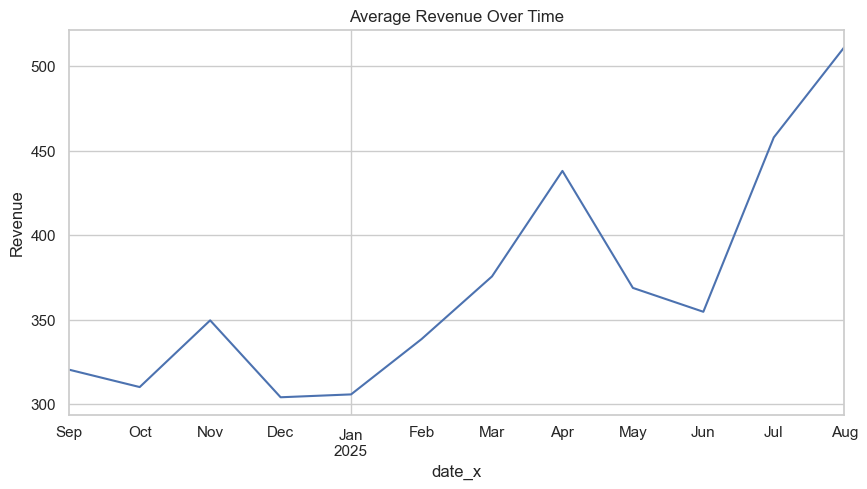

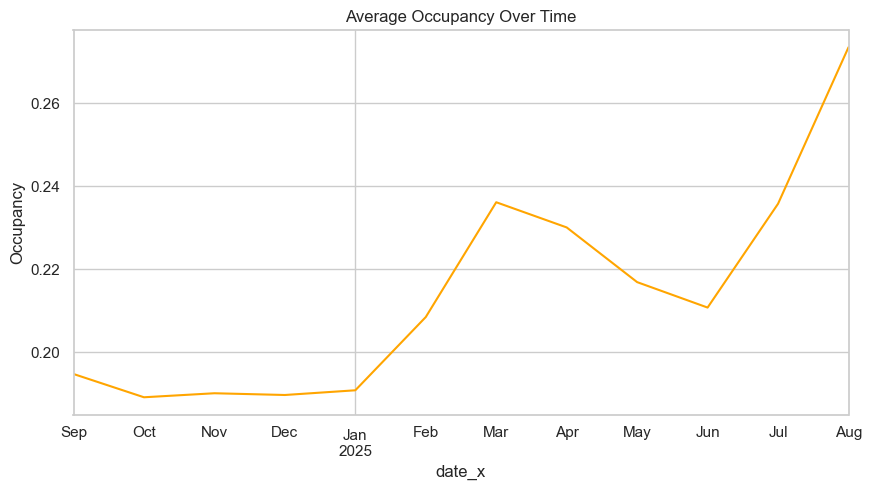

In [18]:
# Convert date if not already
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Revenue over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["revenue"].mean().plot()
plt.title("Average Revenue Over Time")
plt.ylabel("Revenue")
plt.show()

# Occupancy over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["occupancy"].mean().plot(color="orange")
plt.title("Average Occupancy Over Time")
plt.ylabel("Occupancy")
plt.show()


- **Average Revenue:** Fluctuating but generally increasing. Lowest in **Dec 2024 (~300)**, gradually rising to **425 in Apr 2025**, and peaking in **Aug 2025 (>500)**.  

- **Average Occupancy:** Mirrors revenue trends. Low and stable (~20%) from Sep 2024 to Jan 2025, rising to **24% in Mar 2025**, and peaking at **26% in Aug 2025**.  

- **Overall Trend:** Both metrics show a **seasonal pattern**, with highest performance in **summer months (July–August 2025)**. Revenue shows a stronger upward trend, suggesting higher earnings per occupied unit during peak season.


### 5.4 Correlation Analysis

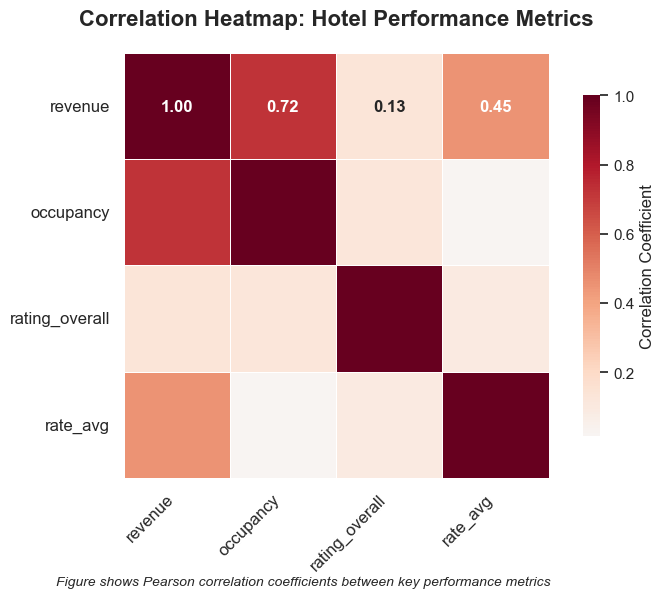

In [19]:
plt.figure(figsize=(8, 6))

# Create the correlation matrix
corr_matrix = master_df[["revenue", "occupancy", "rating_overall", "rate_avg"]].corr()

# Create heatmap with improved styling
heatmap = sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="RdBu_r",  # Better color scheme for correlations
            fmt=".2f", 
            center=0,  # Center colormap at 0
            square=True,  # Square cells
            linewidths=0.5,  # Add grid lines
            linecolor='white',  # White grid lines
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 12, "weight": "bold"})  # Better annotation styling

# Improve title and labels
plt.title("Correlation Heatmap: Hotel Performance Metrics", 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add a descriptive caption if needed
plt.figtext(0.5, 0.01, "Figure shows Pearson correlation coefficients between key performance metrics", 
           ha="center", fontsize=10, style='italic')

plt.show()

- **Revenue & Occupancy (0.72):** Strong positive correlation; higher occupancy generally leads to higher revenue.  
- **Revenue & Average Rate (0.45):** Moderate positive correlation; increasing average price can raise revenue, but less strongly than occupancy.  
- **Occupancy & Average Rate (~0):** No linear correlation; changes in price have little linear effect on occupancy.  
- **Overall Rating & Other Variables:** Very weak correlations (revenue: 0.13, occupancy: ~0); ratings do not strongly impact revenue or occupancy.


### 5.5 Geospatial Analysis

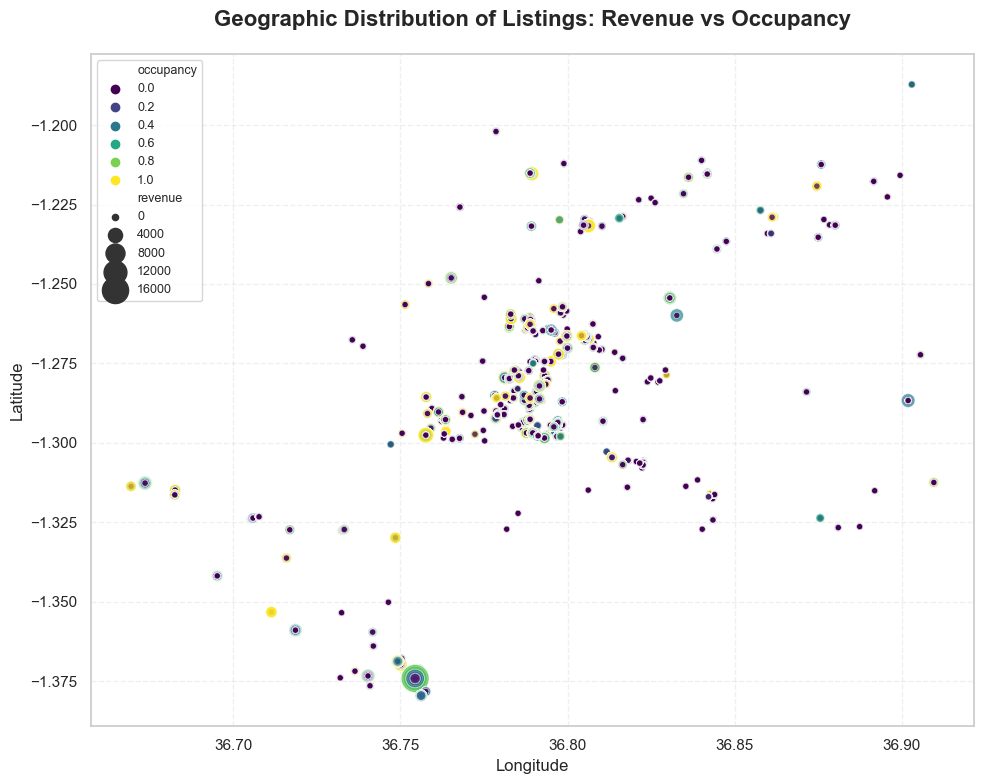

In [20]:
plt.figure(figsize=(10, 8))

# Create the scatter plot with improved parameters
scatter = sns.scatterplot(
    data=master_df, 
    x="longitude", 
    y="latitude",
    size="revenue", 
    hue="occupancy", 
    alpha=0.7, 
    palette="viridis",
    sizes=(20, 400),  # Control the size range explicitly
    edgecolor='white',  # Add white edges for better distinction
    linewidth=0.5
)

# Improve title and labels
plt.title("Geographic Distribution of Listings: Revenue vs Occupancy", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Improve legend
plt.legend(
    title_fontsize=10,
    fontsize=9,
    frameon=True,
    fancybox=True,
    framealpha=0.8,
    loc='best'  # Automatically choose best position
)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Improve colorbar if needed (optional)
# plt.colorbar(scatter, label='Occupancy Rate')

plt.show()


- **Clustering:** Most listings are concentrated around **-1.28 Latitude** and **36.8 Longitude**, corresponding to Nairobi city center or popular neighborhoods.  
- **Revenue Hotspots:** Largest circles (high revenue) are mainly within the central cluster, with a few high-revenue outliers outside it.  
- **Occupancy Patterns:** Color variation shows mixed occupancy levels. High revenue does not always correspond to high occupancy, suggesting some listings earn more through higher nightly rates rather than occupancy.

### 5.6 Time Series / Seasonality

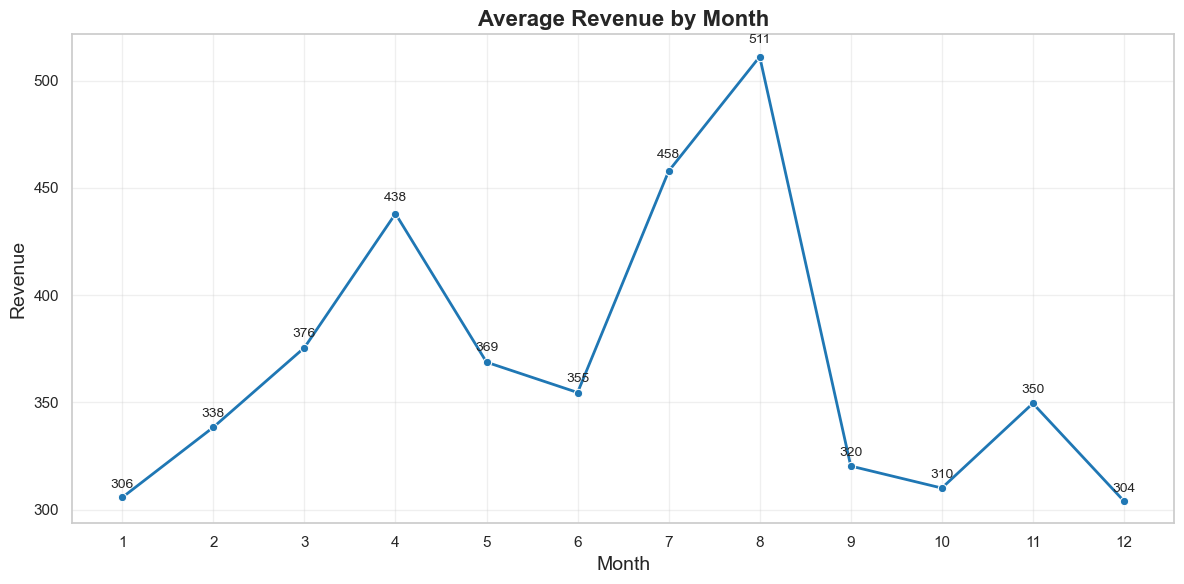

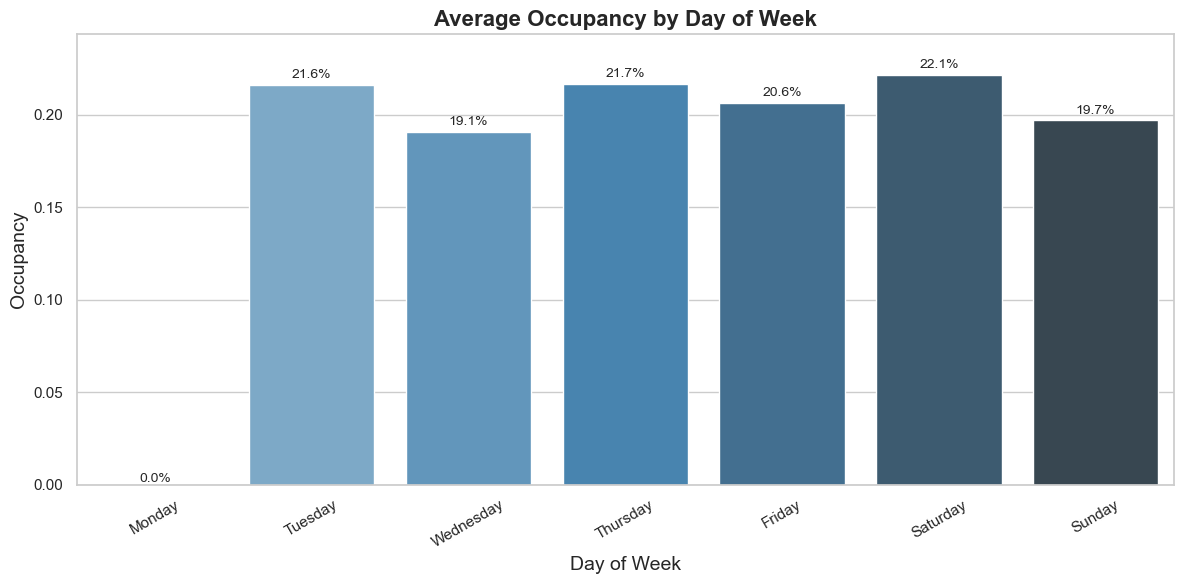

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# Set style and fonts
# -------------------------------
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})

# -------------------------------
# Extract month and day of week
# -------------------------------
master_df["month"] = master_df["date_x"].dt.month
master_df["day_of_week"] = master_df["date_x"].dt.day_name()

# -------------------------------
# Monthly Revenue Trend
# -------------------------------
monthly_rev = master_df.groupby("month")["revenue"].mean().fillna(0)  # Fill NaNs

plt.figure(figsize=(12,6))
sns.lineplot(
    x=monthly_rev.index, 
    y=monthly_rev.values, 
    marker="o", 
    color="#1f77b4",  # Dark blue
    linewidth=2
)

# Annotate points
for x, y in zip(monthly_rev.index, monthly_rev.values):
    plt.text(x, y + 0.01*y, f"{y:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Average Revenue by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(monthly_rev.index)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------
# Day of Week Occupancy
# -------------------------------
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_occ = master_df.groupby("day_of_week")["occupancy"].mean().reindex(dow_order).fillna(0)

plt.figure(figsize=(12,6))
sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d")

# Annotate bars
for i, val in enumerate(dow_occ.values):
    plt.text(i, val + 0.01*val, f"{val:.1%}", ha='center', va='bottom', fontsize=10)

plt.title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
plt.ylabel("Occupancy", fontsize=14)
plt.xlabel("Day of Week", fontsize=14)
plt.xticks(rotation=30)
plt.ylim(0, dow_occ.max() * 1.1)  # Safe, no NaNs
plt.tight_layout()
plt.show()


- **Average Revenue by Month:**  
  - **Peaks:** April (438) and August (511), with August being the highest, indicating periods of high demand.  
  - **Troughs:** January (306), December (304), and October (310), reflecting lower-demand periods.  
  - **Trend:** Revenue shows **monthly fluctuations**, with late-year and early-year months generally lower and mid-year months higher.  

- **Average Occupancy by Day of Week:**  
  - **Highest:** Saturday (22.1%), Tuesday (21.6%), Thursday (21.7%).  
  - **Lowest:** Monday (0.0%), Wednesday (19.1%), Sunday (19.7%).  
  - **Trend:** Occupancy is generally lower on weekdays, with a peak on Saturday. Monday shows particularly low occupancy, likely because **most bookings occur over the weekend**, so fewer listings are occupied at the start of the week.
